# Glass

In [ ]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from urllib import request

url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(url)
dataset = np.loadtxt(f, dtype=float, delimiter=',', skiprows=1) 
n, feat = dataset.shape
dataset

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [ ]:
TARGET_COLUMNS = ["Type"]
X = dataset[:,:feat-1]
y = dataset[:,feat-1].copy()

In [ ]:
X0 = X - X.mean()

In [ ]:
ECM = np.zeros(shape=(feat-1))
energia = np.zeros(shape=(feat-1))

for i in range(1, feat):
  pca = decomposition.PCA(n_components=i)
  pca.fit(X0)
  U = pca.transform(X0) 
  Xh = pca.inverse_transform(U)
  ECM[i-1] = np.sum((X0-Xh)**2)/n
  energia[i-1] = np.sum(pca.explained_variance_ratio_)

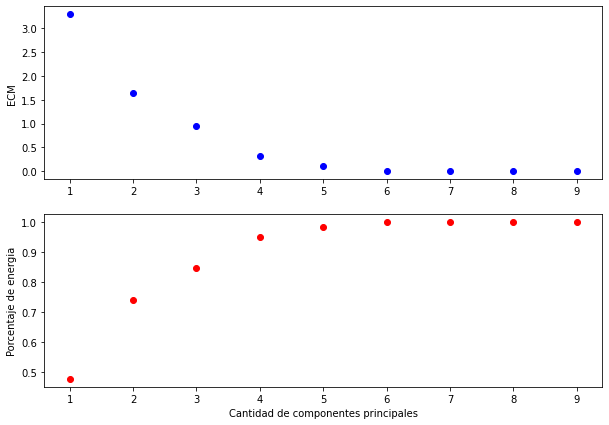

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 7))

for i in range(0, feat-1):
  axs[0].plot(i+1, ECM[i], 'o', color="blue")
  axs[1].plot(i+1, energia[i], 'o', color="red")


axs[0].set(ylabel="ECM" )
axs[1].set(ylabel="Porcentaje de energia" )
plt.xlabel("Cantidad de componentes principales")
plt.show()

In [ ]:
pca = decomposition.PCA(n_components=1)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)

ave = pca.components_
ava = pca.explained_variance_
print('Autovector:', ave) 
print('Autovalor:', ava) 
print('Porcentaje de energia:',pca.explained_variance_ratio_) 

Autovector: [[ 0.00092813  0.01722483 -0.72353491  0.04633522 -0.00769381 -0.07840429
   0.6797168   0.07635801  0.0009057 ]]
Autovalor: [3.00200916]
Porcentaje de energia: [0.47620525]


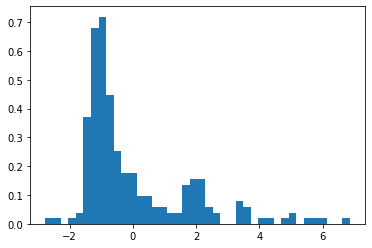

In [ ]:
from scipy import stats as st


plt.hist(U, bins=40, density=True)
plt.show()

In [ ]:
mu = U.mean()
sigma = np.sqrt(np.sum((U-U.mean())**2/(n-1)))

Propongo que:

\begin{equation}
  U \sim \mathcal{N}(\mu, \sigma)
\end{equation}

Luego:
\begin{equation}
  X \sim \mathcal{U}(0,1)
\end{equation}

\begin{equation}
  P(X\le{x}) = P(U\le{u})
\end{equation}

\begin{equation}
  F_X(x) = F_U(u)
\end{equation}

\begin{equation}
  x = \phi(u)
\end{equation}

\begin{equation}
  u = \phi(x)^{-1}
\end{equation}


In [ ]:
alpha_sim = (np.random.randn(5) + mu) * sigma

alpha_sim = np.reshape(alpha_sim, (1,5,1))
pca.inverse_transform(alpha_sim) + X.mean()

array([[[ 1.51851221e+00,  1.34105747e+01,  2.57010056e+00,
          1.45223478e+00,  7.26497177e+01,  4.84655884e-01,
          9.06446463e+00,  1.87123287e-01,  5.71525879e-02],
        [ 1.51905707e+00,  1.34206866e+01,  2.14534552e+00,
          1.47943612e+00,  7.26452011e+01,  4.38628229e-01,
          9.46349600e+00,  2.31949665e-01,  5.76842811e-02],
        [ 1.51603445e+00,  1.33645907e+01,  4.50167497e+00,
          1.32853663e+00,  7.26702574e+01,  6.93966739e-01,
          7.24986860e+00, -1.67247621e-02,  5.47347118e-02],
        [ 1.51836062e+00,  1.34077613e+01,  2.68827780e+00,
          1.44466671e+00,  7.26509744e+01,  4.97461903e-01,
          8.95344433e+00,  1.74651492e-01,  5.70046578e-02],
        [ 1.51455376e+00,  1.33371111e+01,  5.65596473e+00,
          1.25461584e+00,  7.26825317e+01,  8.19048836e-01,
          6.16548397e+00, -1.38542340e-01,  5.32898130e-02]]])

# Prostata

In [ ]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from urllib import request

prostata_data = np.genfromtxt(request.urlopen("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"), delimiter=',', skip_header=True)
prostata_label = np.genfromtxt(request.urlopen("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"), delimiter=',', skip_header=True, dtype="str")

In [ ]:
prostata_data = prostata_data[:,1:-1]
prostata_label = prostata_label[:,1]
dataset = np.c_[prostata_data, prostata_label]
dataset = dataset[dataset[:,-1] != '']
dataset

array([['182.88666186557907', '0.0', '120.05514344779301', ...,
        '78.37018497556028', '1194.6142797413468', 'healthy'],
       ['169.43159030962224', '4.546040591889395', '298.45756678247994',
        ..., '108.7634073540107', '926.9470629677108', 'healthy'],
       ['33.12437860839822', '1717.1493536474945', '171.34008138556848',
        ..., '27.398994070467992', '510.64609776288006', 'cancer'],
       ...,
       ['113.63945879890655', '1.4285461257602596', '89.56082978818914',
        ..., '111.93171044261584', '447.58706049886086', 'benign'],
       ['100.94499664510126', '213.6023595973982', '533.7078535932463',
        ..., '157.6249104461427', '630.2223691989038', 'benign'],
       ['17.15438852402047', '20.59355440565786', '167.40034087942942',
        ..., '56.84535066851054', '137.33733651318974', 'cancer']],
      dtype='<U32')

In [ ]:
valores_unicos = np.unique(dataset[:,-1], return_inverse=True)
dataset[:,-1] = valores_unicos[1]
categorias = valores_unicos[0]

In [ ]:
x_train = dataset[:,:-2]
x_train = x_train.astype(float)
y_train = dataset[:,-1]
y_train = y_train.astype(int)
x_train.shape

(390, 760)

In [ ]:
n, feat = x_train.shape
X0 = (x_train - x_train.mean())/x_train.std()

In [ ]:
from tqdm import tqdm
step = 10
limit = min(n, feat) // step

ECM = np.zeros(shape=(limit))
energia = np.zeros(shape=(limit))


for i in tqdm(range(0, limit)):
  pca = decomposition.PCA(n_components=i*step)
  pca.fit(X0)
  U = pca.transform(X0) 
  Xh = pca.inverse_transform(U)
  ECM[i] = np.sum((X0-Xh)**2)/n
  energia[i] = np.sum(pca.explained_variance_ratio_)

100%|██████████| 39/39 [00:07<00:00,  5.01it/s]


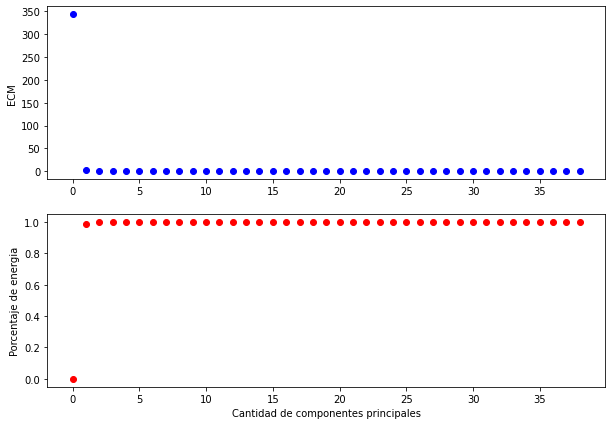

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 7))

for i in range(0, limit):
  axs[0].plot(i*step, ECM[i], 'o', color="blue")
  axs[1].plot(i*step, energia[i], 'o', color="red")


axs[0].set(ylabel="ECM" )
axs[1].set(ylabel="Porcentaje de energia" )
plt.xlabel("Cantidad de componentes principales")
plt.show()

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)

ave = pca.components_
ava = pca.explained_variance_

In [ ]:
colores = np.array(['red', 'blue', 'green', 'yellow'])

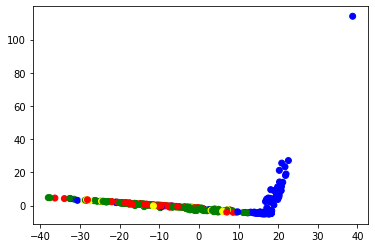

In [ ]:
plt.scatter(x=U[:,0], y=U[:,1], color=colores[y_train])
plt.show()

# MNIST

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns

sns.set()

mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(anomaly_train_images, anomaly_train_labels), (anomaly_test_images, anomaly_test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def show_images(images, labels=None, image_count=25, random=True):
  plt.figure(figsize=(10,10))
  cant_subplot = np.sqrt(image_count)
  cant_subplot_int = int(cant_subplot)

  if(cant_subplot_int != cant_subplot):
    print("image_count no es un numero con raiz entera, se va a recortar el numero de imagenes") 

  for i in range(image_count):
    plt.subplot(cant_subplot,cant_subplot,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_index = i
    if random:
      img_index = np.random.randint(0, images.shape[0])
    plt.imshow(images[img_index], cmap="gray_r")
    if labels is not None:
      plt.xlabel(labels[img_index])

In [3]:
X0 = (train_images - train_images.mean())
X0= np.reshape(X0, (X0.shape[0], X0.shape[1]*X0.shape[2]))
n, feat = X0.shape

### 1.

In [ ]:
from tqdm import tqdm
step = 10
limit = min(n, feat)
ECM = np.zeros(shape=(limit // step))
energia = np.zeros(shape=(limit // step))

In [ ]:
pca = decomposition.PCA(n_components=limit)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
ave = pca.components_
ava_normalizado = pca.explained_variance_ratio_

In [ ]:
for i in tqdm(range(0, limit // step)):
  Xhi = U[:,:i*step]@ave[:i*step] + pca.mean_
  ECM[i] = np.sum((X0-Xhi)**2)/n
  energia[i] = np.sum(ava_normalizado[:i*step])

100%|██████████| 78/78 [02:01<00:00,  1.56s/it]


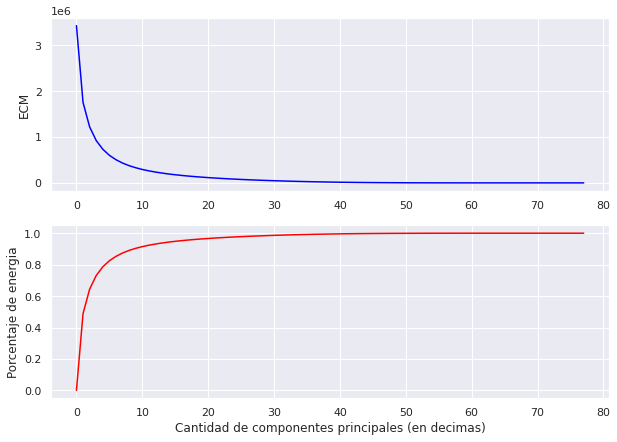

In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 7))

axs[0].plot(ECM, color="blue", )
axs[1].plot(energia, color="red")

axs[0].set(ylabel="ECM" )
axs[1].set(ylabel="Porcentaje de energia" )
plt.xlabel("Cantidad de componentes principales (en decimas)")
plt.show()

In [ ]:
ECM[30], energia[30]

(47213.987355269535, 0.9862287476125926)

### 2. Podemos ver que con 300 componentes principales, tenemos una energia muy cerca de 98.6% y cerca de 7.65 ECM

In [ ]:
test_images_normalizadas = test_images - train_images.mean()
shape_original = test_images_normalizadas.shape
test_images_normalizadas = np.reshape(test_images_normalizadas, (shape_original[0], shape_original[1]*shape_original[2]))

In [ ]:
componentes_principales = 300
U_testeo = pca.transform(test_images_normalizadas)
Xh_testeo = U_testeo[:,:componentes_principales]@ave[:componentes_principales] + pca.mean_
Xh_testeo = np.reshape(Xh_testeo, (shape_original[0], shape_original[1], shape_original[2]))

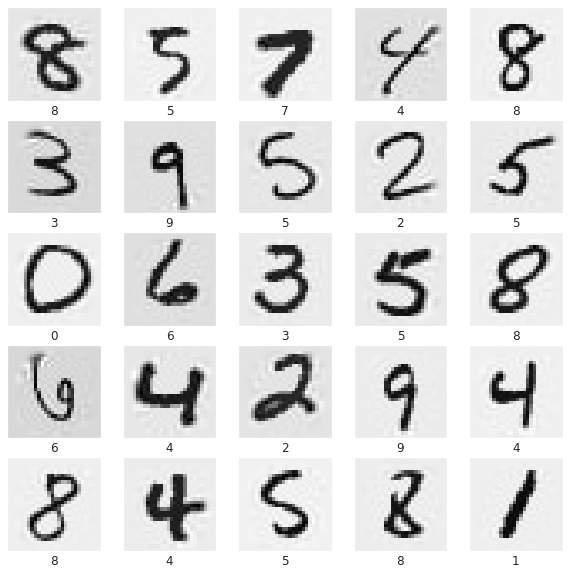

In [ ]:
show_images(Xh_testeo, test_labels)

### 3. Manifold

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 

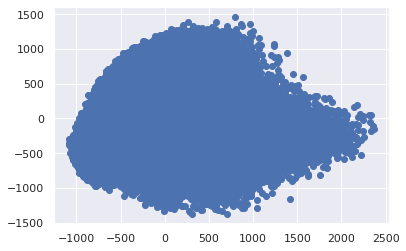

In [ ]:
plt.scatter(x=U[:,0], y=U[:,1])
plt.show()

In [ ]:
minimos = U.min(axis=0)
maximos = U.max(axis=0)

print(f"Limites en eje x: ({minimos[0]}; {maximos[0]})")
print(f"Limites en eje y: ({minimos[1]}; {maximos[1]})")

Limites en eje x: (-1081.6595315646064; 2363.3224234990985)
Limites en eje y: (-1382.3449864005418; 1465.9382635505222)


In [ ]:
grilla_eje_x = np.linspace(start=minimos[0], stop=maximos[0], num=10)
grilla_eje_y = np.linspace(start=minimos[1], stop=maximos[1], num=10)

X,Y = np.meshgrid(grilla_eje_x, grilla_eje_y)

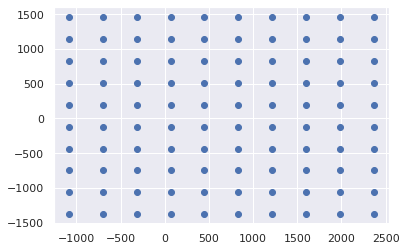

In [ ]:
plt.scatter(x=X, y=Y)
plt.show()

In [ ]:
reconstruccion = [pca.inverse_transform(np.array([x,y])) for y in grilla_eje_y for x in grilla_eje_x]
reconstruccion = np.array(reconstruccion)

In [ ]:
reconstruccion = reconstruccion.reshape(100, 28, 28)

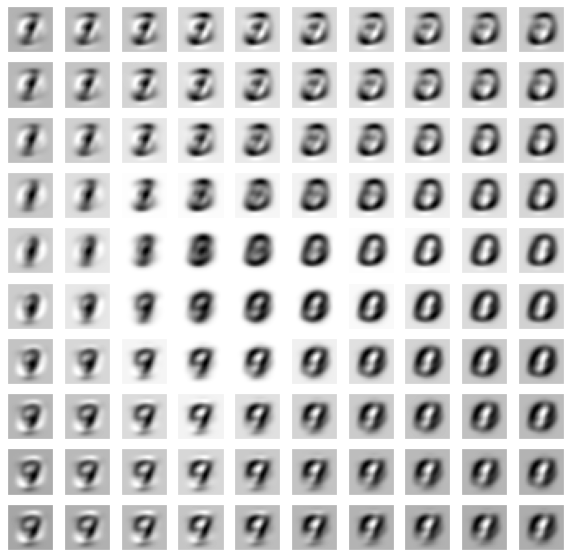

In [ ]:
show_images(reconstruccion, image_count=100, random=False)

### 4. Anomalias

In [ ]:
pca = decomposition.PCA(n_components=300)
pca.fit(X0)

PCA(n_components=300)

In [ ]:
dataset_mezclado = np.concatenate([test_images, anomaly_test_images])
dataset_mezclado_normalizado = dataset_mezclado - dataset_mezclado.mean()
shape_original = dataset_mezclado_normalizado.shape

dataset_mezclado_reshape = np.reshape(dataset_mezclado_normalizado, (shape_original[0], shape_original[1]*shape_original[2]))

shape_original, dataset_mezclado_reshape.shape

((20000, 28, 28), (20000, 784))

In [ ]:
U = pca.transform(dataset_mezclado_reshape)
Xh = pca.inverse_transform(U)
EC = np.sum(dataset_mezclado_reshape-Xh, axis=1)**2

In [ ]:
umbral = 2*EC.mean()

dataset_filtrado = dataset_mezclado_reshape[EC < umbral]

In [ ]:
dataset_filtrado_reshape = dataset_filtrado.reshape(dataset_filtrado.shape[0], shape_original[1], shape_original[2])
dataset_filtrado_reshape.shape

(19568, 28, 28)

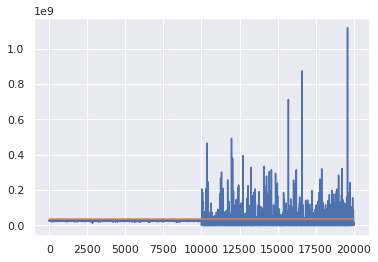

In [ ]:
plt.plot(EC)
plt.plot([0,19999], [umbral, umbral])
plt.show()

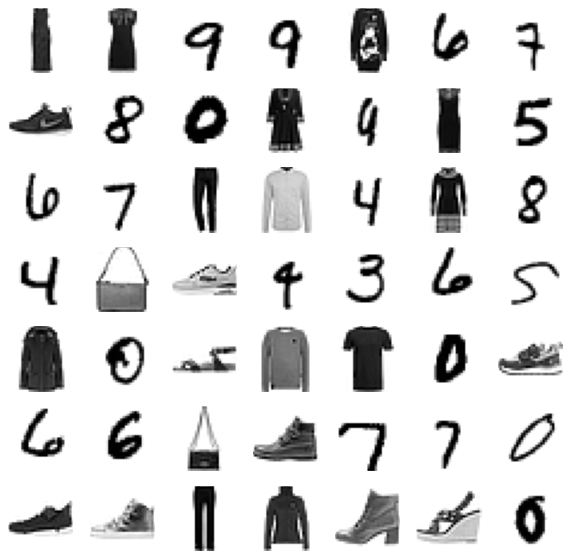

In [ ]:
show_images(dataset_filtrado_reshape, image_count=49)

In [ ]:
def positive_rates(EC, step = 5000000, umbral_start=None, umbral_stop=None):
  if umbral_start is None:
    umbral_start = int(np.floor(EC.min()))

  if umbral_start is None:
    umbral_stop = int(np.ceil(EC.max()))

  mask = np.full((20000), False)
  mask[:10000] = True

  size = int(np.ceil((umbral_stop-umbral_start) // step))
  TP = np.zeros((size))
  FP = np.zeros((size))

  for i in range(0, size):
    umbral = i*step + umbral_start
    TP[i] = dataset_mezclado_reshape[(EC <= umbral) & mask].shape[0]
    FP[i] = dataset_mezclado_reshape[(EC <= umbral) & (np.logical_not(mask))].shape[0]

  TPR = TP / 10000
  FPR = FP / 10000
  TNR = 1 - FPR
  FNR = 1 - TPR

  return TPR, FPR, TNR, FNR

TPR, FPR, TNR, FNR = positive_rates(EC, step=1000000, umbral_start=0, umbral_stop=10*EC.mean())


EER: 0.2779


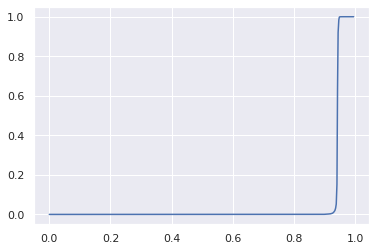

In [ ]:
plt.plot(FPR, TPR)

EER = (FPR[FNR != 0]/FNR[FNR != 0])
EER = EER[EER != 0]

print("EER:", EER.min())

plt.show()

### 5.

In [4]:
pca = decomposition.PCA(n_components=300)
pca.fit(X0)
U = pca.transform(X0)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(np.unique(train_labels).size,  input_dim=U.shape[1], activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=U, y=train_labels, batch_size = U.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 0s 436ms/step - loss: 3.5403 - accuracy: 0.8826
Epoch 2/2000
1/1 [==============================] - 0s 128ms/step - loss: 3.4761 - accuracy: 0.8890
Epoch 3/2000
1/1 [==============================] - 0s 128ms/step - loss: 3.4709 - accuracy: 0.8884
Epoch 4/2000
1/1 [==============================] - 0s 114ms/step - loss: 3.4663 - accuracy: 0.8882
Epoch 5/2000
1/1 [==============================] - 0s 103ms/step - loss: 3.4619 - accuracy: 0.8882
Epoch 6/2000
1/1 [==============================] - 0s 108ms/step - loss: 3.4576 - accuracy: 0.8880
Epoch 7/2000
1/1 [==============================] - 0s 106ms/step - loss: 3.4533 - accuracy: 0.8880
Epoch 8/2000
1/1 [==============================] - 0s 104ms/step - loss: 3.4491 - accuracy: 0.8880
Epoch 9/2000
1/1 [==============================] - 0s 135ms/step - loss: 3.4449 - accuracy: 0.8879
Epoch 10/2000
1/1 [==============================] - 0s 114ms/step - loss: 3.4407 - accuracy: 0.8878

In [13]:
losses = hist.history["loss"]
accuracies = hist.history["accuracy"]

print(f"El riesgo empirico final fue {losses[-1]}")
print(f"La accuracy final fue {accuracies[-1]}")

El riesgo empirico final fue 1.9067339897155762
La accuracy final fue 0.8919833302497864


In [18]:
X_test = (test_images - train_images.mean())
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

x_test_transformado = pca.transform(X_test)
x_test_transformado

array([[-3.32271169e+02,  7.47798716e+02, -4.28448190e+01, ...,
        -1.86534924e+00, -4.36533690e+00,  1.19056936e+01],
       [ 2.06969621e+01, -9.55584583e+02, -1.52715517e+02, ...,
        -2.59287672e+01, -1.88886071e+01, -4.82975777e+01],
       [-9.46026868e+02, -4.30843183e+02,  6.61763364e+01, ...,
         7.96245036e+00,  2.09731607e+00,  9.71585803e+00],
       ...,
       [-2.70187755e+02,  5.96870087e+02,  3.55110676e+02, ...,
        -3.28319559e+01,  1.16718222e+01,  1.18118013e+01],
       [-3.14027192e+02, -1.08603556e+02,  6.42839801e+02, ...,
         2.11342153e+01,  1.31287174e-01, -1.10844040e+01],
       [ 1.04238931e+03, -9.05147068e+01,  7.06119029e+02, ...,
         2.71423386e+01,  1.67525929e+01, -2.23784101e+01]])

In [19]:
y_pred = model.predict(x_test_transformado).argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Baseline model:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.93      0.95      0.94      1135
           2       0.89      0.86      0.88      1032
           3       0.87      0.87      0.87      1010
           4       0.90      0.87      0.88       982
           5       0.86      0.83      0.85       892
           6       0.88      0.91      0.90       958
           7       0.89      0.88      0.89      1028
           8       0.85      0.82      0.83       974
           9       0.85      0.89      0.87      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



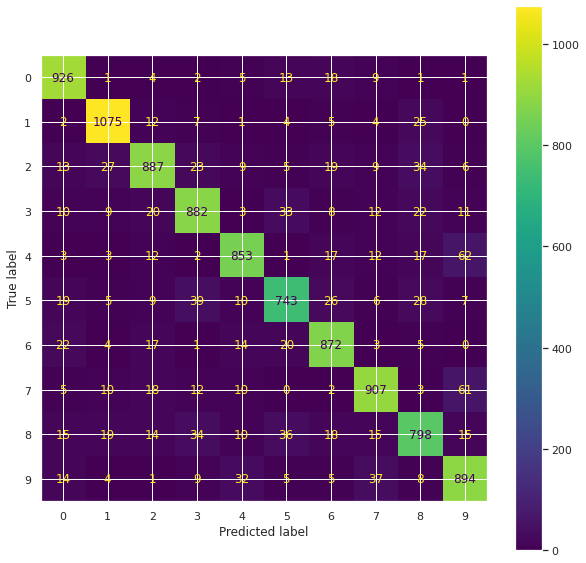

In [20]:
# from matplotlib import axis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))


print("Baseline model:")
show_results(test_labels,y_pred)

In [23]:
Xh = pca.inverse_transform(U)
Xh.shape

(60000, 784)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(np.unique(train_labels).size,  input_dim=Xh.shape[1], activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=Xh, y=train_labels, batch_size = Xh.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 1s 525ms/step - loss: 28.2655 - accuracy: 0.6805
Epoch 2/2000
1/1 [==============================] - 0s 227ms/step - loss: 16.9306 - accuracy: 0.7442
Epoch 3/2000
1/1 [==============================] - 0s 214ms/step - loss: 16.2315 - accuracy: 0.7506
Epoch 4/2000
1/1 [==============================] - 0s 218ms/step - loss: 15.7231 - accuracy: 0.7558
Epoch 5/2000
1/1 [==============================] - 0s 218ms/step - loss: 15.2784 - accuracy: 0.7602
Epoch 6/2000
1/1 [==============================] - 0s 220ms/step - loss: 14.8793 - accuracy: 0.7642
Epoch 7/2000
1/1 [==============================] - 0s 223ms/step - loss: 14.5169 - accuracy: 0.7683
Epoch 8/2000
1/1 [==============================] - 0s 218ms/step - loss: 14.1856 - accuracy: 0.7716
Epoch 9/2000
1/1 [==============================] - 0s 214ms/step - loss: 13.8805 - accuracy: 0.7749
Epoch 10/2000
1/1 [==============================] - 0s 217ms/step - loss: 13.5981 - accura

In [28]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Baseline model:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       980
           1       0.95      0.95      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.81      0.86      0.83      1010
           4       0.89      0.85      0.87       982
           5       0.79      0.83      0.81       892
           6       0.90      0.90      0.90       958
           7       0.91      0.85      0.88      1028
           8       0.83      0.73      0.78       974
           9       0.77      0.88      0.82      1009

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



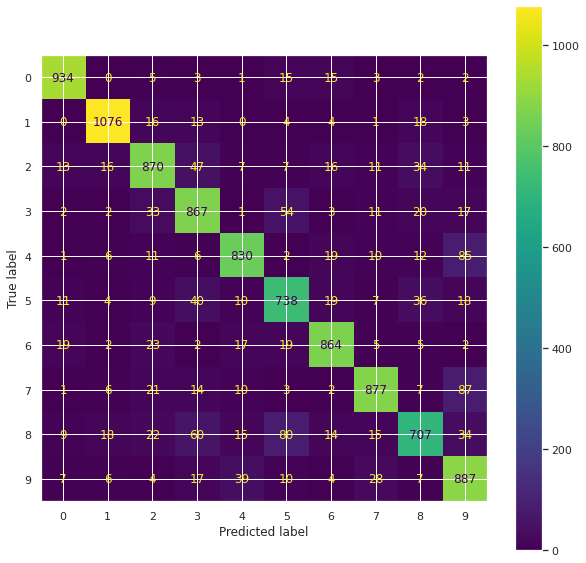

In [29]:
print("Baseline model:")
show_results(test_labels,y_pred)

Los resultados son todos muy similares, excepto por la reconstruccion que pareceria haber dado resultados levemente peores.

### 6.

In [42]:
import os
!pip install fasttext
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from IPython.display import clear_output
import xml.etree.ElementTree as ET




if not os.path.exists("cc.en.300.bin"):
  # Más vectores de palabras en https://github.com/dccuchile/spanish-word-embeddings
  !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
  !gzip -d cc.en.300.bin.gz
  


if not os.path.exists("articles/"):
  !wget https://zenodo.org/record/1239675/files/articles.zip?download=1 -O articles.zip
  !unzip articles.zip
  !rm articles.zip

clear_output()
print("Data successfully downloaded")

sns.set()
random_seed = 20

Data successfully downloaded


In [36]:
model = fasttext.load_model('cc.en.300.bin')

In [48]:
def read_data(test_size=0.2,random_state=0):
  data = {
      # "author": [],
      # "title": [],
      "mainText": [],
      "orientation": [],
      # "veracity": []
  }
  index = []
  for filename in os.listdir("articles/"):
    root = ET.parse(f"articles/{filename}").getroot()
    index.append(int(filename.split(".")[0]))
    for elem in root:
      if elem.tag in data.keys():
        data[elem.tag].append(elem.text)
  data = pd.DataFrame(data,index=index)
  data = data[data.notna().all(axis="columns")]
  data = data.sample(frac=1,random_state=random_state)
  N = len(data)
  train_split, test_split = data.iloc[int(N*test_size):,:], data.iloc[:int(N*test_size),:]
  train_split = train_split.reset_index(drop=True)
  test_split = test_split.reset_index(drop=True)
  return train_split, test_split
  
train_split, test_split = read_data(test_size=0.2,random_state=random_seed)
train_split

,mainText,orientation
0,"One does not have to bleed red, white and blue...",right
1,Please disable your Ad Blocker in order to int...,right
2,I’m probably going to a very not good place fo...,right
3,Republican nominee Donald Trump’s Ohio chairwo...,left
4,"Washington (CNN) Vigo County, Indiana, is used...",mainstream
...,...,...
1279,Mike Pence defended his running mate Donald Tr...,mainstream
1280,Vermont Sen. Bernie Sanders is planning a “ver...,mainstream
1281,When Donald Trump was asked by debate moderato...,mainstream
1282,Hillary Clinton's campaign announced late Frid...,mainstream


In [49]:
def normalize_text(corpus, stop_words = None):
  corpus_lower = corpus.str.lower()

  normalized_corpus = corpus_lower.str.replace(r"[^\w\d\s]+","",regex=True)
  
  if stop_words is not None:
    normalized_corpus = normalized_corpus.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

  normalized_corpus = normalized_corpus.str.replace(r"\s+"," ",regex=True)

  return normalized_corpus

train_data, test_data = read_data(test_size=0.2,random_state=random_seed)
train_data["mainText"] = normalize_text(train_data["mainText"],stop_words=None)
train_data

,mainText,orientation
0,one does not have to bleed red white and blue ...,right
1,please disable your ad blocker in order to int...,right
2,im probably going to a very not good place for...,right
3,republican nominee donald trumps ohio chairwom...,left
4,washington cnn vigo county indiana is used to ...,mainstream
...,...,...
1279,mike pence defended his running mate donald tr...,mainstream
1280,vermont sen bernie sanders is planning a very ...,mainstream
1281,when donald trump was asked by debate moderato...,mainstream
1282,hillary clintons campaign announced late frida...,mainstream


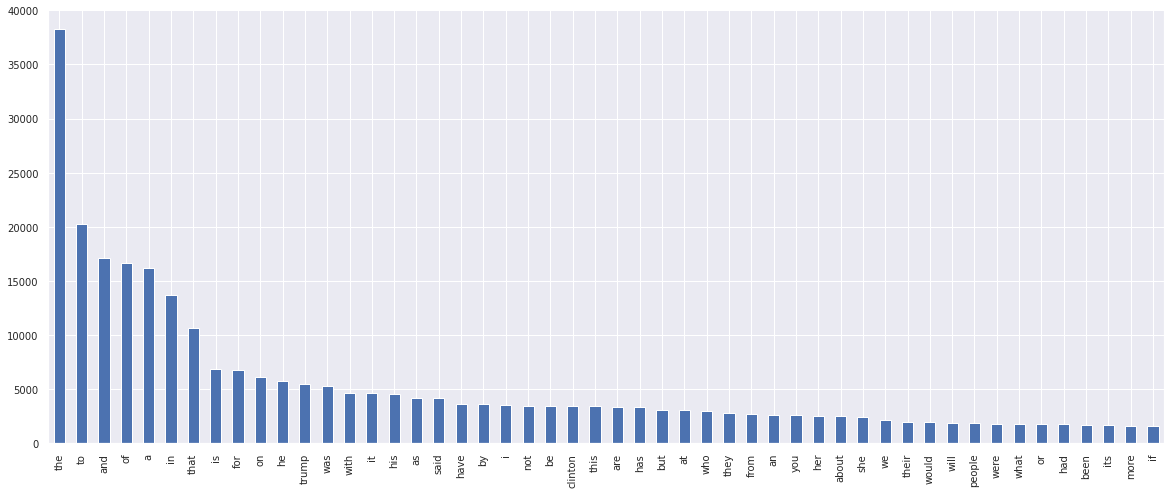

In [50]:
from collections import defaultdict

def create_vocabulary(corpus, max_tokens=40000, min_freq=1):
  vocab = defaultdict(lambda: 0)
  for content in corpus:
    # print(content)
    for word in content.split():
      vocab[word] += 1

  valid_tokens = sorted([token for token in vocab.keys() if vocab[token] >= min_freq], key=vocab.get,reverse=True)[:max_tokens]
  return pd.Series(vocab,index=valid_tokens)

vocab = create_vocabulary(train_data["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

In [44]:
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_eng = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
train_data, test_data = read_data(test_size=0.2,random_state=random_seed)
train_data["mainText"] = normalize_text(train_data["mainText"],stop_words=stopwords_eng)
train_data

,mainText,orientation
0,one bleed red white blue order live country ho...,right
1,please disable ad blocker order interact site ...,right
2,im probably going good place laughing cant hel...,right
3,republican nominee donald trumps ohio chairwom...,left
4,washington cnn vigo county indiana used gettin...,mainstream
...,...,...
1279,mike pence defended running mate donald trumps...,mainstream
1280,vermont sen bernie sanders planning vigorous t...,mainstream
1281,donald trump asked debate moderator lester hol...,mainstream
1282,hillary clintons campaign announced late frida...,mainstream


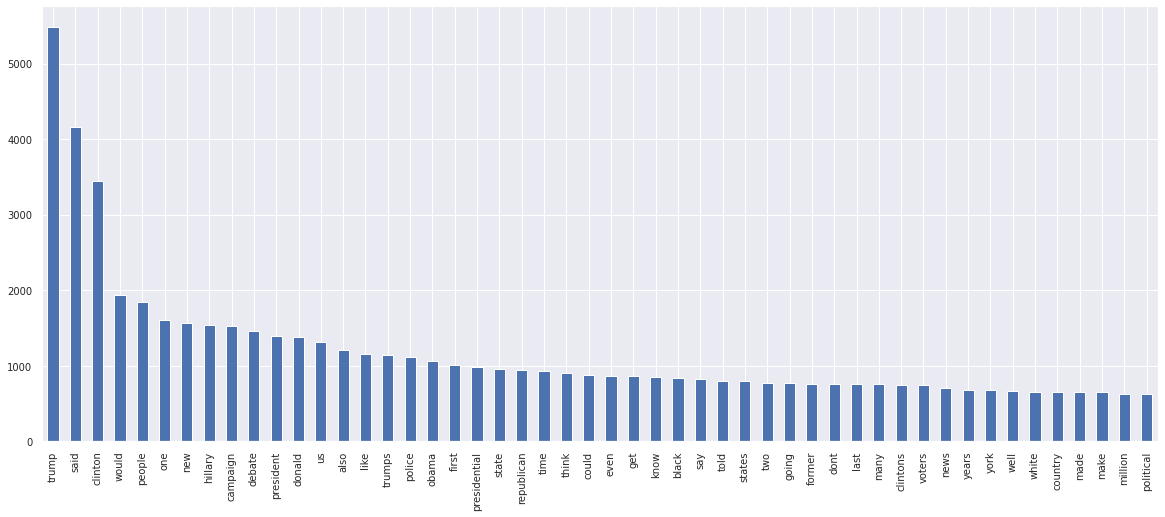

In [52]:
vocab = create_vocabulary(train_data["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

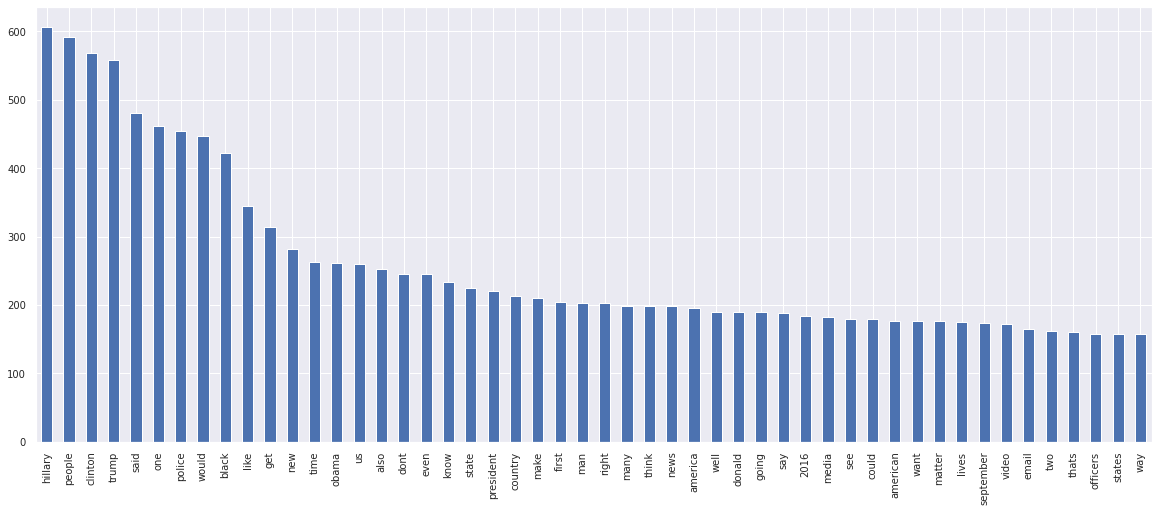

In [84]:
data_der = train_data[train_data['orientation'] == 'right']
vocab_der = create_vocabulary(data_der["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab_der[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

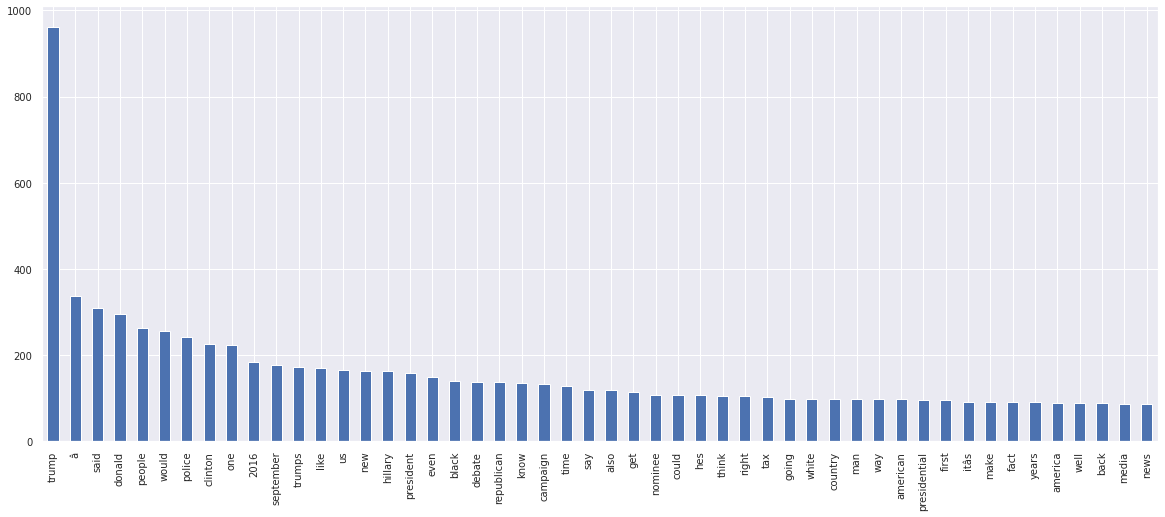

In [85]:
data_izq = train_data[train_data['orientation'] == 'left']
vocab_izq = create_vocabulary(data_izq["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab_izq[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

In [104]:
vocab_der_vector = [model[word] for word in vocab_der.index]
vocab_izq_vector = [model[word] for word in vocab_izq.index]

In [107]:
pca_der = decomposition.PCA(n_components=2)
pca_der.fit(vocab_der_vector)
U_der = pca_der.transform(vocab_der_vector[:20])

In [108]:
pca_izq = decomposition.PCA(n_components=2)
pca_izq.fit(vocab_izq_vector)
U_izq = pca_izq.transform(vocab_izq_vector[:20])

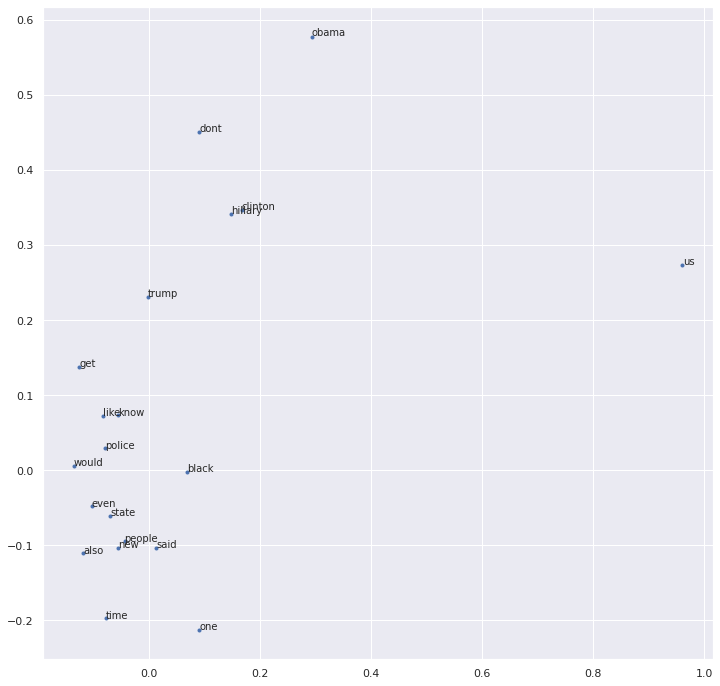

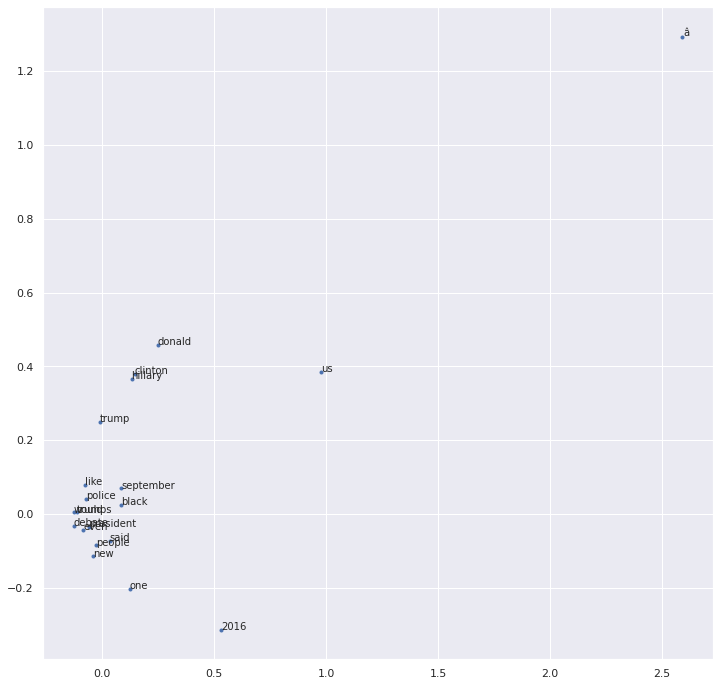

In [142]:
def plot_words(vocab, U):
  fig, ax = plt.subplots(1,1,figsize=(12,12))
  ax.plot(U[:,0],U[:,1],"o",ms=3)

  # Anoto las palabras
  for i, word in enumerate(vocab[:20].index):
    ax.annotate(word, (U[i,0]*1.001,U[i,1]*1.001), fontsize=10)

plot_words(vocab_der, U_der)
plot_words(vocab_izq, U_izq)